# Importing Dependencies

In [47]:
!pip install tensorflow
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.text import one_hot, Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from tensorflow.keras.layers import LSTM, SimpleRNN, Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences

# Loading Data

In [8]:
data = pd.read_csv('IMDB Dataset.csv')

In [9]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
data.shape

(50000, 2)

# Data Pre-Processing

In [13]:
data.isnull().any()

review       False
sentiment    False
dtype: bool

In [18]:
data['review'][4]

'Petter Mattei\'s "Love in the Time of Money" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler\'s play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.<br /><br />The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case wit

# *Removing '<--->' Tag*
### Using Regular Expression we remove (<--><-->) type tags

In [22]:
 Tag = re.compile(r'<[^>]+>')

 def remove(text):
  return Tag.sub('', text)

In [23]:
new='''Petter Mattei\'s "Love in the Time of Money" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler\'s play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.<br /><br />The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case with most of the people we encounter.<br /><br />The acting is good under Mr. Mattei\'s direction. Steve Buscemi, Rosario Dawson, Carol Kane, Michael Imperioli, Adrian Grenier, and the rest of the talented cast, make these characters come alive.<br /><br />We wish Mr. Mattei good luck and await anxiously for his next work'''

remove(new)

'Petter Mattei\'s "Love in the Time of Money" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. This being a variation on the Arthur Schnitzler\'s play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case with most of the people we 

# *Filtering important words*
### Removing unimportant characters, numbers, spaces... etc using Regular Expression

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...

[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
def preprocess(sen):
     sentence = sen.lower()

     # Remove html tags
     sentence = remove(sentence)

     # Remove punctuations and numbers
     sentence = re.sub('[^a-zA-Z]', ' ', sentence)

     # Single character removal
     sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

     # Remove multiple spaces
     sentence = re.sub(r'\s+', ' ', sentence)

     # Remove Stopwords
     pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
     sentence = pattern.sub('', sentence)

     return sentence

In [25]:
preprocess(new)

'petter mattei love time money visually stunning film watch mr mattei offers us vivid portrait human relations movie seems telling us money power success people different situations encounter variation arthur schnitzler play theme director transfers action present time new york different characters meet connect one connected one way another next person one seems know previous point contact stylishly film sophisticated luxurious look taken see people live world live habitat thing one gets souls picture different stages loneliness one inhabits big city exactly best place human relations find sincere fulfillment one discerns case people encounter acting good mr mattei direction steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talented cast make characters come alive wish mr mattei good luck await anxiously next work'

# Getting Trainable Data

In [26]:
X = []
sentences = list(data['review'])
for sen in sentences:
    X.append(preprocess(sen))

In [27]:
X[4]

'petter mattei love time money visually stunning film watch mr mattei offers us vivid portrait human relations movie seems telling us money power success people different situations encounter variation arthur schnitzler play theme director transfers action present time new york different characters meet connect one connected one way another next person one seems know previous point contact stylishly film sophisticated luxurious look taken see people live world live habitat thing one gets souls picture different stages loneliness one inhabits big city exactly best place human relations find sincere fulfillment one discerns case people encounter acting good mr mattei direction steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talented cast make characters come alive wish mr mattei good luck await anxiously next work '

In [30]:
Y = data['sentiment']

Y = np.array(list(map(lambda x: 1 if x=="positive" else 0, Y)))

# Using Train Test Split

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# Tokenizing Words into numerical sequences

In [32]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [34]:
vocab_length = len(word_tokenizer.word_index)+1
vocab_length

92394

# Padding

In [35]:
max_len=100
X_train=pad_sequences(X_train, padding='post',maxlen=max_len)
X_test=pad_sequences(X_test, padding='post',maxlen=max_len)

# Creating Embedding Matrix
### *using pre-trained GloVe Model (Download from GloVe Website)*

In [37]:
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('a2_glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [38]:
embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector


embedding_matrix.shape

(92394, 100)

# RNN Model Building

In [42]:
rnn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=max_len , trainable=False)

rnn_model.add(embedding_layer)
rnn_model.add(SimpleRNN(128))

rnn_model.add(Dense(1, activation='sigmoid'))

In [43]:
rnn_model.summary()

Model: "sequential_1"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 embedding (Embedding)       (None, 100, 100)          9239400   

                                                                 

 simple_rnn (SimpleRNN)      (None, 128)               29312     

                                                                 

 dense (Dense)               (None, 1)                 129       

                                                                 


Total params: 9268841 (35.36 MB)

Trainable params: 29441 (115.00 KB)

Non-trainable params: 9239400 (35.25 MB)

_________________________________________________________________


In [44]:
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# Training RNN Model

In [45]:
rnn_model_history = rnn_model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10

250/250 [==============================] - 37s 135ms/step - loss: 0.6819 - acc: 0.5562 - val_loss: 0.6842 - val_acc: 0.5450

Epoch 2/10

250/250 [==============================] - 33s 131ms/step - loss: 0.6612 - acc: 0.5993 - val_loss: 0.5962 - val_acc: 0.7061

Epoch 3/10

250/250 [==============================] - 31s 122ms/step - loss: 0.6820 - acc: 0.5593 - val_loss: 0.6772 - val_acc: 0.5659

Epoch 4/10

250/250 [==============================] - 30s 122ms/step - loss: 0.6719 - acc: 0.5621 - val_loss: 0.6629 - val_acc: 0.5734

Epoch 5/10

250/250 [==============================] - 30s 119ms/step - loss: 0.6787 - acc: 0.5766 - val_loss: 0.6893 - val_acc: 0.5315

Epoch 6/10

250/250 [==============================] - 33s 132ms/step - loss: 0.6854 - acc: 0.5409 - val_loss: 0.6878 - val_acc: 0.5383

Epoch 7/10

250/250 [==============================] - 28s 112ms/step - loss: 0.6757 - acc: 0.5626 - val_loss: 0.6818 - val_acc: 0.5452

Epoch 8/10

250/250 [====================

# Evaluating RNN Model on test data

In [46]:
rnn_score = rnn_model.evaluate(X_test, Y_test, verbose=1)
print("Test Accuracy:", rnn_score[1])

313/313 [==============================] - 6s 20ms/step - loss: 0.6838 - acc: 0.5455

Test Accuracy: 0.5454999804496765


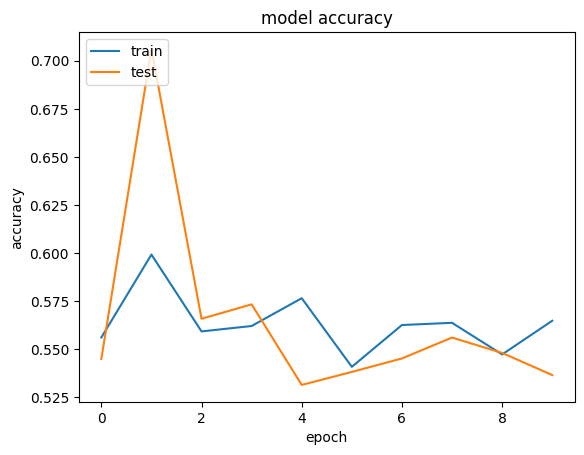

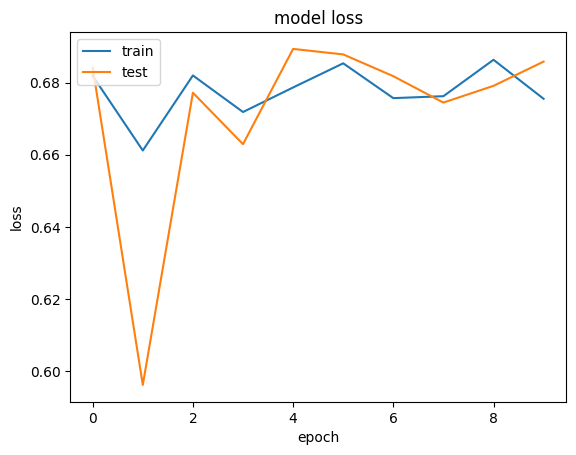

In [48]:
plt.plot(rnn_model_history.history['acc'])
plt.plot(rnn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(rnn_model_history.history['loss'])
plt.plot(rnn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# LSTM Model Building

In [50]:
lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=max_len , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(1, activation='sigmoid'))

In [51]:
lstm_model.summary()

Model: "sequential_3"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 embedding_1 (Embedding)     (None, 100, 100)          9239400   

                                                                 

 lstm (LSTM)                 (None, 128)               117248    

                                                                 

 dense_1 (Dense)             (None, 1)                 129       

                                                                 


Total params: 9356777 (35.69 MB)

Trainable params: 117377 (458.50 KB)

Non-trainable params: 9239400 (35.25 MB)

_________________________________________________________________


# Training LSTM Model

In [52]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [55]:
lstm_model_history = lstm_model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10

250/250 [==============================] - 87s 349ms/step - loss: 0.5068 - acc: 0.7504 - val_loss: 0.4292 - val_acc: 0.8098

Epoch 2/10

250/250 [==============================] - 89s 358ms/step - loss: 0.4213 - acc: 0.8133 - val_loss: 0.4253 - val_acc: 0.7895

Epoch 3/10

250/250 [==============================] - 86s 345ms/step - loss: 0.3790 - acc: 0.8333 - val_loss: 0.3600 - val_acc: 0.8457

Epoch 4/10

250/250 [==============================] - 85s 342ms/step - loss: 0.3442 - acc: 0.8521 - val_loss: 0.3364 - val_acc: 0.8551

Epoch 5/10

250/250 [==============================] - 87s 347ms/step - loss: 0.3216 - acc: 0.8635 - val_loss: 0.3442 - val_acc: 0.8486

Epoch 6/10

250/250 [==============================] - 83s 333ms/step - loss: 0.3088 - acc: 0.8723 - val_loss: 0.3294 - val_acc: 0.8702

Epoch 7/10

250/250 [==============================] - 89s 358ms/step - loss: 0.2847 - acc: 0.8827 - val_loss: 0.3732 - val_acc: 0.8240

Epoch 8/10

250/250 [====================

# Evaluating LSTM Model on test Data

In [56]:
lstm_score = lstm_model.evaluate(X_test, Y_test, verbose=1)
print("Test Accuracy:", lstm_score[1])

313/313 [==============================] - 20s 64ms/step - loss: 0.3142 - acc: 0.8672

Test Accuracy: 0.8672000169754028


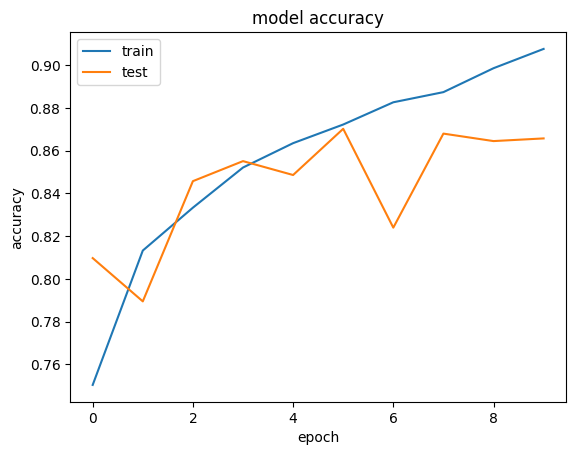

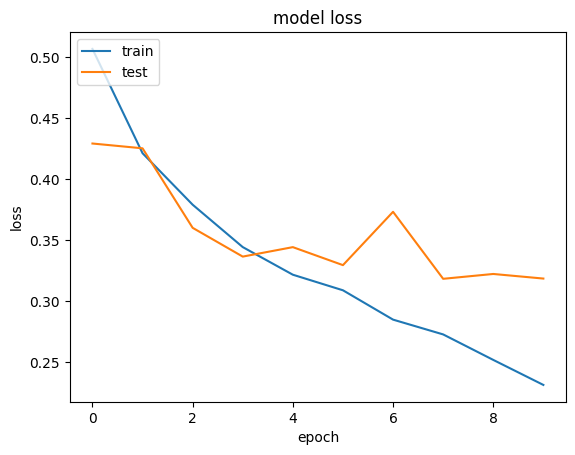

In [57]:
plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()



*   RNN Model Gives around 55% accuracy
*   LSTM Model gives around 87% accuracy

LSTM models outperform simple RNNs due to their ability to capture long-term dependencies through memory cells and gating mechanisms, mitigating the vanishing gradient problem.
